In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [12]:
#FILE FROM GALAXY NAMED CAMI AMBER: Results
url_result = "https://usegalaxy.eu/api/datasets/4838ba20a6d86765773e1fc5f802d3c8/display?to_ext=tabular"
#FILE FROM GALAXY NAMED recover_genome.tsv
url_genome = 'https://usegalaxy.eu/api/datasets/4838ba20a6d867654178d66e416f0f90/display?to_ext=tabular'
#FILE FROM GALAXY NAMED taxonomic_values.tsv
url_tax_val = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765cd14bc2883986fec/display?to_ext=tabular'
#FILE FROM GALAXY NAMEED values.tsv
ulr_val = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765b860086970c49431/display?to_ext=tabular'

#DATA FRAME FOR EACH URL
df_result = pd.read_csv(url_result, sep="\t")
df_genome = pd.read_csv(url_genome, sep="\t")
df_tax_val = pd.read_csv(url_tax_val, sep="\t")
df_val = pd.read_csv(ulr_val, sep="\t")

html_result = df_result.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_result}
</div>
'''
display(HTML(scrollable_html))

print(df_genome.columns)
print(df_genome.shape)
html_genome = df_genome.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_genome}
</div>
'''
display(HTML(scrollable_html))

print(df_tax_val.columns)
print(df_tax_val.shape)
html_tax_val = df_tax_val.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_tax_val}
</div>
'''
display(HTML(scrollable_html))

print(df_val.columns)
print(df_val.shape)
html_val = df_val.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_val}
</div>
'''
display(HTML(scrollable_html))

Sample,Tool,accuracy_bp,accuracy_seq,adjusted_rand_index_bp,adjusted_rand_index_seq,binning type,f1_score_bp,f1_score_bp_cami1,f1_score_per_bp,f1_score_per_seq,f1_score_seq,f1_score_seq_cami1,misclassification_bp,misclassification_seq,percentage_of_assigned_bps,percentage_of_assigned_seqs,precision_avg_bp,precision_avg_bp_sem,precision_avg_bp_var,precision_avg_seq,precision_avg_seq_sem,precision_weighted_bp,precision_weighted_seq,rand_index_bp,rand_index_seq,rank,recall_avg_bp,recall_avg_bp_cami1,recall_avg_bp_sem,recall_avg_bp_sem_cami1,recall_avg_bp_var,recall_avg_bp_var_cami1,recall_avg_seq,recall_avg_seq_cami1,recall_avg_seq_sem,recall_avg_seq_sem_cami1,recall_weighted_bp,recall_weighted_seq,unifrac_bp,unifrac_seq
sample_0,Gold standard,1.000000,1.000000,1.000000,1.000000,genome,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
sample_0,MetaBat2_GTDB,0.222290,0.015277,0.319594,0.202816,genome,0.268534,0.173199,0.432974,0.057693,0.204142,0.139702,0.395171,0.579647,0.367526,0.036344,0.870606,0.025793,0.054552,0.832778,0.029305,0.604829,0.420353,0.960980,0.928914,NaN,0.158750,0.096165,0.012973,0.011147,0.099135,0.073683,0.116329,0.076246,0.010836,0.009543,0.337171,0.030972,NaN,NaN
sample_0,CONCOCT_GTDB,0.275896,0.034938,0.454497,0.195196,genome,0.551598,0.272358,0.465960,0.098909,0.471053,0.224432,0.417811,0.584912,0.473894,0.084171,0.682971,0.020629,0.093626,0.622311,0.022817,0.582189,0.415088,0.985717,0.968620,NaN,0.462613,0.170094,0.017319,0.013481,0.176666,0.115229,0.378946,0.136902,0.016685,0.011877,0.388417,0.056143,NaN,NaN
sample_0,SemiBin_GTDB,0.270691,0.013831,0.876319,0.812169,genome,0.219155,0.196625,0.422795,0.028712,0.165702,0.153678,0.102661,0.191589,0.301660,0.017109,0.814365,0.023023,0.064135,0.770752,0.025008,0.897339,0.808411,0.996719,0.993697,NaN,0.126614,0.111810,0.012074,0.011494,0.085870,0.080450,0.092830,0.085348,0.010163,0.009712,0.276547,0.014615,NaN,NaN
sample_0,DAS Tool_GTDB,0.219592,0.010498,0.939113,0.915641,genome,0.193237,0.171586,0.368904,0.023081,0.156518,0.139923,0.055271,0.119752,0.232439,0.011926,0.950322,0.013258,0.011074,0.855770,0.029294,0.944729,0.880248,0.997771,0.994216,NaN,0.107553,0.094307,0.011889,0.011402,0.083250,0.076577,0.086136,0.076190,0.010221,0.009713,0.229202,0.011694,NaN,NaN
sample_1,Gold standard,1.000000,1.000000,1.000000,1.000000,genome,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
sample_1,MetaBat2_GTDB,0.220798,0.014461,0.364031,0.160098,genome,0.273487,0.189420,0.424421,0.057338,0.209232,0.153459,0.366827,0.598361,0.348717,0.036005,0.859374,0.024707,0.057990,0.817735,0.029353,0.633173,0.401639,0.972326,0.928524,NaN,0.162620,0.106441,0.012623,0.011315,0.098788,0.079885,0.119963,0.084675,0.010732,0.009723,0.319188,0.030873,NaN,NaN
sample_1,CONCOCT_GTDB,0.241509,0.031398,0.407126,0.149128,genome,0.508442,0.256149,0.441603,0.101432,0.425338,0.211312,0.472328,0.636031,0.457689,0.086267,0.691217,0.020566,0.096854,0.631403,0.023548,0.527672,0.363969,0.984978,0.963973,NaN,0.402113,0.157203,0.016452,0.012764,0.167824,0.109490,0.320681,0.126889,0.015716,0.011273,0.379674,0.058927,NaN,NaN
sample_1,SemiBin_GTDB,0.254987,0.013545,0.873103,0.768733,genome,0.221840,0.208074,0.401603,0.027256,0.167704,0.160133,0.103570,0.173392,0.284448,0.016386,0.834496,0.019425,0.053583,0.802301,0.021748,0.896430,0.826608,0.997039,0.994164,NaN,0.127923,0.118855,0.011825,0.011324,0.086691,0.082329,0.093638,0.088943,0.009867,0.009467,0.258765,0.013857,NaN,NaN
sample_1,DAS Tool_GTDB,0.207127,0.010923,0.951687,0.828684,geno

Index(['Sample', 'Tool', 'Contamination', '> 50% completeness',
       '> 70% completeness', '> 90% completeness'],
      dtype='object')
(100, 6)


Sample,Tool,Contamination,> 50% completeness,> 70% completeness,> 90% completeness
sample_0,CONCOCT_GTDB,< 10%,51,42,31
sample_0,CONCOCT_GTDB,< 5%,46,39,29
sample_0,DAS Tool_GTDB,< 10%,54,50,38
sample_0,DAS Tool_GTDB,< 5%,51,47,36
sample_0,Gold standard,< 10%,589,589,589
sample_0,Gold standard,< 5%,589,589,589
sample_0,MetaBat2_GTDB,< 10%,45,41,30
sample_0,MetaBat2_GTDB,< 5%,43,39,30
sample_0,SemiBin_GTDB,< 10%,58,50,37
sample_0,SemiBin_GTDB,< 5%,57,49,37


Index(['Sample', 'Tool', 'purity_bp', 'completeness_bp',
       'percentage_binned_pb', 'unifrac_bp', 'rank'],
      dtype='object')
(100, 7)


Sample,Tool,purity_bp,completeness_bp,percentage_binned_pb,unifrac_bp,rank
sample_0,Gold standard,1.000,1.000,1.000,0.000,phylum
sample_0,MetaBat2_GTDB,0.981,0.174,0.177,5.569,phylum
sample_0,CONCOCT_GTDB,0.967,0.221,0.228,4.888,phylum
sample_0,SemiBin_GTDB,0.992,0.258,0.260,3.604,phylum
sample_0,DAS Tool_GTDB,0.998,0.207,0.208,4.728,phylum
sample_1,Gold standard,1.000,1.000,1.000,0.000,phylum
sample_1,MetaBat2_GTDB,0.947,0.183,0.193,5.682,phylum
sample_1,CONCOCT_GTDB,0.930,0.191,0.205,5.168,phylum
sample_1,SemiBin_GTDB,0.971,0.234,0.241,4.161,phylum
sample_1,DAS Tool_GTDB,0.977,0.198,0.203,5.313,phylum


Index(['Sample', 'Tool', 'purity_bp', 'completeness_bp',
       'percentage_binned_pb'],
      dtype='object')
(50, 5)


Sample,Tool,purity_bp,completeness_bp,percentage_binned_pb
sample_0,Gold standard,1.000,1.000,1.000
sample_0,MetaBat2_GTDB,0.605,0.337,0.368
sample_0,CONCOCT_GTDB,0.582,0.388,0.474
sample_0,SemiBin_GTDB,0.897,0.277,0.302
sample_0,DAS Tool_GTDB,0.945,0.229,0.232
sample_1,Gold standard,1.000,1.000,1.000
sample_1,MetaBat2_GTDB,0.633,0.319,0.349
sample_1,CONCOCT_GTDB,0.528,0.380,0.458
sample_1,SemiBin_GTDB,0.896,0.259,0.284
sample_1,DAS Tool_GTDB,0.955,0.213,0.217


     Sample           Tool  Purity (bp)
1  sample_0  MetaBat2_GTDB        0.605
2  sample_0   CONCOCT_GTDB        0.582
3  sample_0   SemiBin_GTDB        0.897
4  sample_0  DAS Tool_GTDB        0.945
6  sample_1  MetaBat2_GTDB        0.633


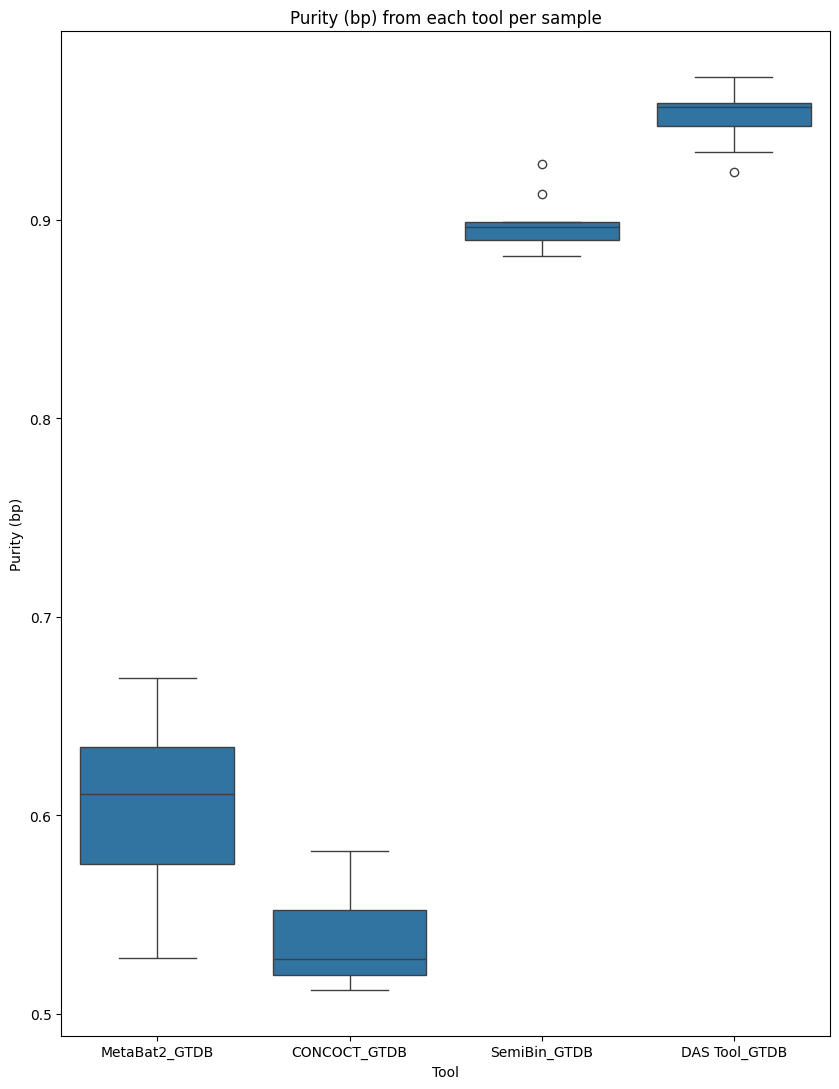

In [13]:
#BOXPLOT FOR PURITY

purity_df = df_val.loc[:,["Sample", "Tool", "purity_bp"]]
purity_df.rename(columns={
    'purity_bp': 'Purity (bp)',
}, inplace=True)
purity_df = purity_df[purity_df['Tool'] != 'Gold standard']
print(purity_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='Purity (bp)', data=purity_df).set(title="Purity (bp) from each tool per sample")
plt.tight_layout()


     Sample           Tool  Completeness (bp)
1  sample_0  MetaBat2_GTDB              0.337
2  sample_0   CONCOCT_GTDB              0.388
3  sample_0   SemiBin_GTDB              0.277
4  sample_0  DAS Tool_GTDB              0.229
6  sample_1  MetaBat2_GTDB              0.319


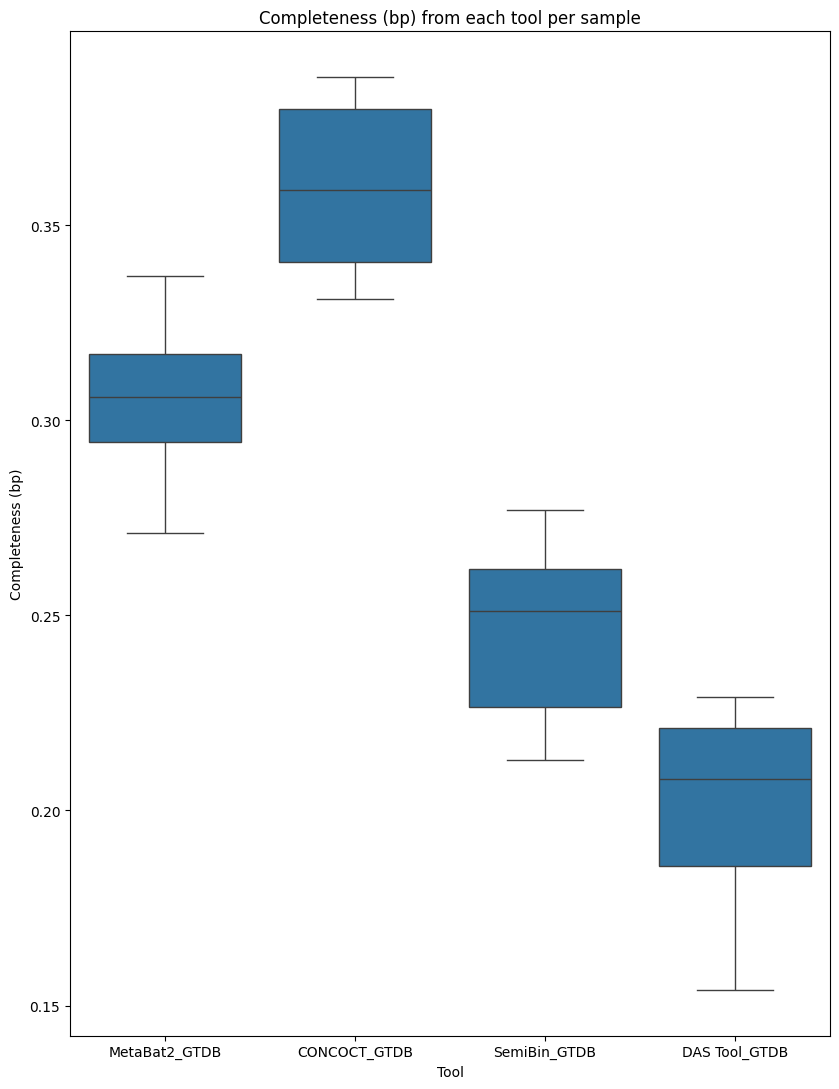

In [14]:
#BOXPLOT FOR COMPLETENESS

completeness_df = df_val.loc[:,["Sample", "Tool", "completeness_bp"]]
completeness_df.rename(columns={
    'completeness_bp': 'Completeness (bp)',
}, inplace=True)
completeness_df = completeness_df[completeness_df['Tool'] != 'Gold standard']
print(completeness_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='Completeness (bp)', data=completeness_df).set(title="Completeness (bp) from each tool per sample")
plt.tight_layout()

     Sample           Tool  Percentage of bp binned (bp)
1  sample_0  MetaBat2_GTDB                         0.368
2  sample_0   CONCOCT_GTDB                         0.474
3  sample_0   SemiBin_GTDB                         0.302
4  sample_0  DAS Tool_GTDB                         0.232
6  sample_1  MetaBat2_GTDB                         0.349


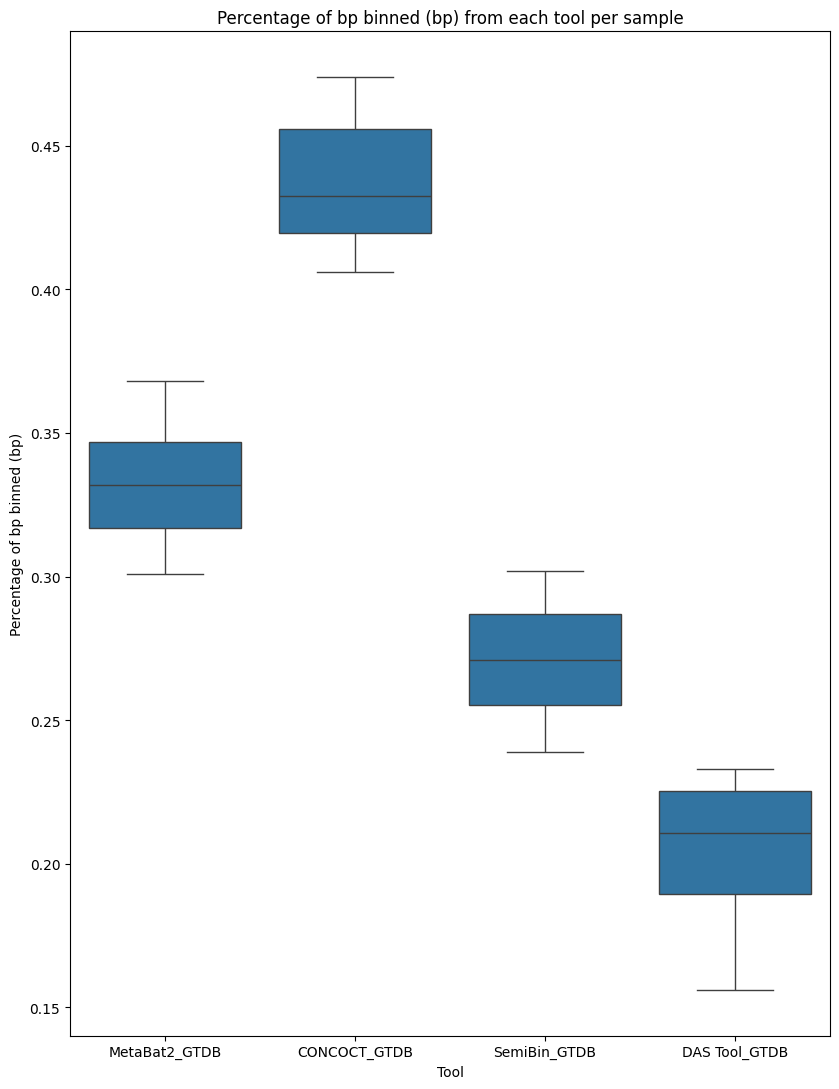

In [15]:
#BOXPLOT FOR Percentage of bp binned

percentage_df = df_val.loc[:,["Sample", "Tool", "percentage_binned_pb"]]
percentage_df.rename(columns={
    'percentage_binned_pb': 'Percentage of bp binned (bp)',
}, inplace=True)
percentage_df = percentage_df[percentage_df['Tool'] != 'Gold standard']
print(percentage_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='Percentage of bp binned (bp)', data=percentage_df).set(title="Percentage of bp binned (bp) from each tool per sample")
plt.tight_layout()

     Sample           Tool  ARI (bp) binning type
1  sample_0  MetaBat2_GTDB  0.319594       genome
2  sample_0   CONCOCT_GTDB  0.454497       genome
3  sample_0   SemiBin_GTDB  0.876319       genome
4  sample_0  DAS Tool_GTDB  0.939113       genome
6  sample_1  MetaBat2_GTDB  0.364031       genome


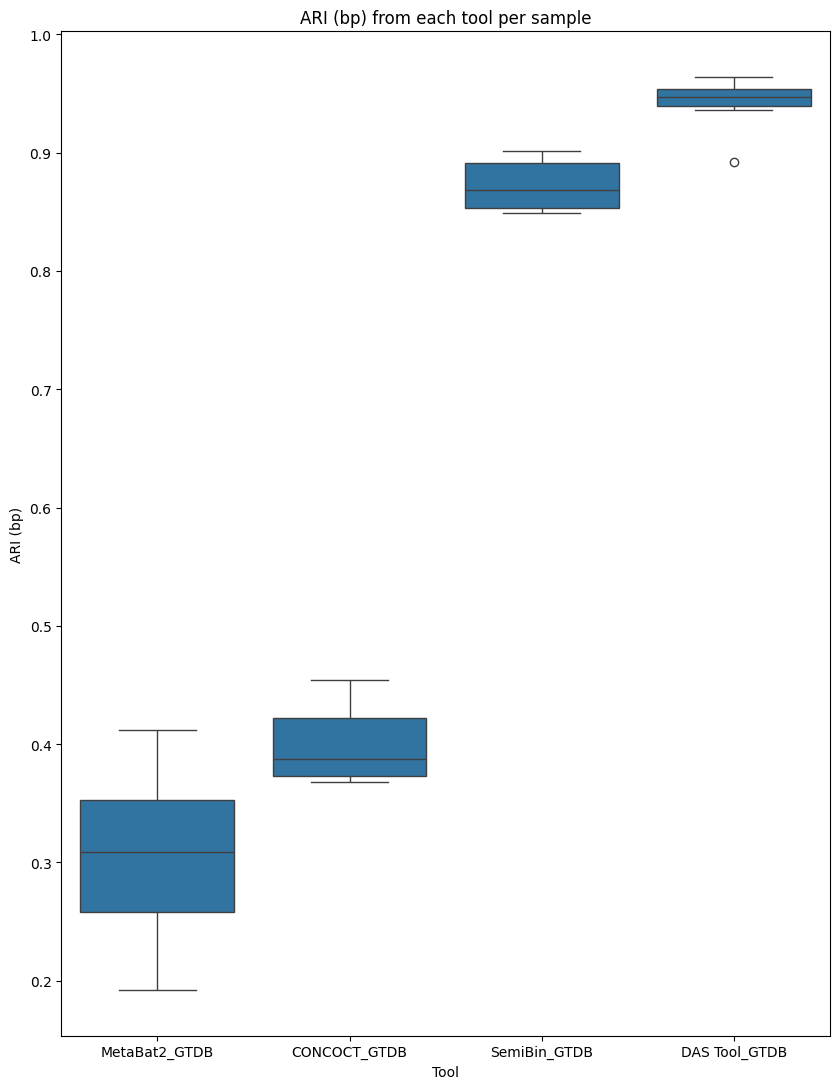

In [16]:
#BOXPLOT FOR ARI

ari_df = df_result.loc[:,["Sample", "Tool", "adjusted_rand_index_bp", 'binning type']]
ari_df.rename(columns={
    'adjusted_rand_index_bp': 'ARI (bp)',
}, inplace=True)
ari_df = ari_df[ari_df['Tool'] != 'Gold standard']
ari_df = ari_df[ari_df['binning type'] == 'genome']
print(ari_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='ARI (bp)', data=ari_df).set(title="ARI (bp) from each tool per sample")
plt.tight_layout()

     Sample           Tool   RI (bp) binning type
1  sample_0  MetaBat2_GTDB  0.960980       genome
2  sample_0   CONCOCT_GTDB  0.985717       genome
3  sample_0   SemiBin_GTDB  0.996719       genome
4  sample_0  DAS Tool_GTDB  0.997771       genome
6  sample_1  MetaBat2_GTDB  0.972326       genome


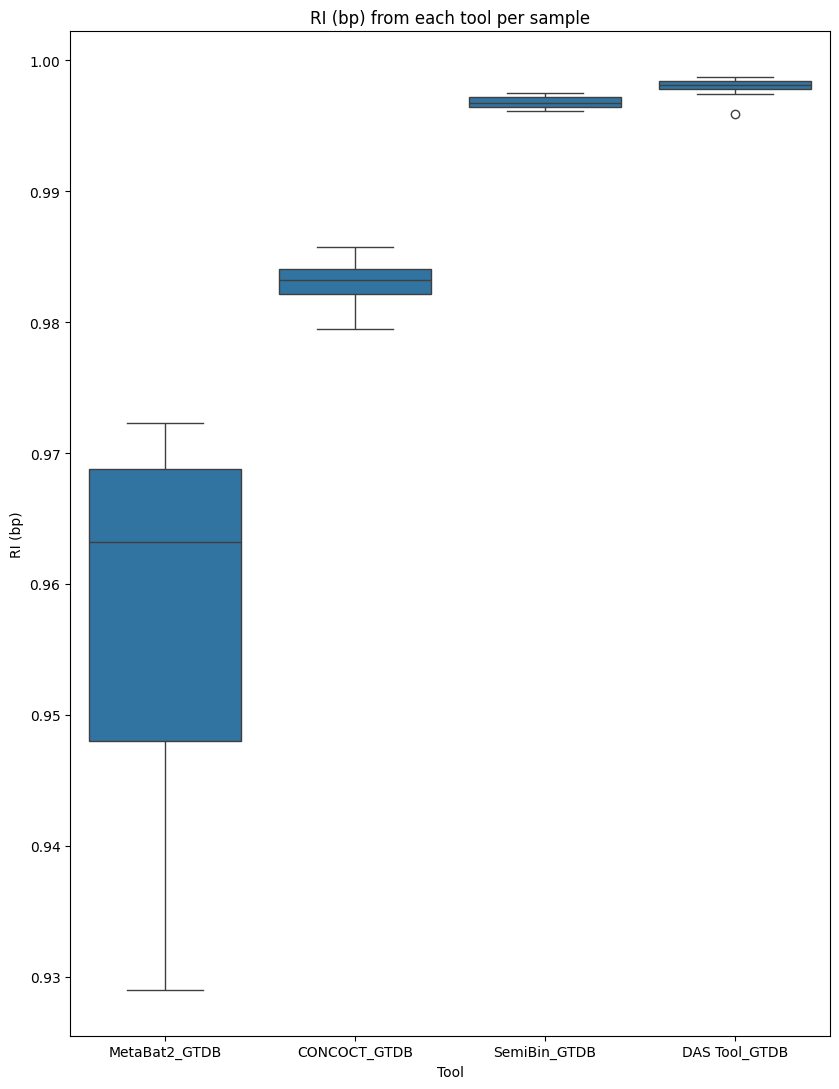

In [17]:
#BOXPLOT FOR RI

ri_df = df_result.loc[:,["Sample", "Tool", "rand_index_bp", 'binning type']]
ri_df.rename(columns={
    'rand_index_bp': 'RI (bp)',
}, inplace=True)
ri_df = ri_df[ri_df['Tool'] != 'Gold standard']
ri_df = ri_df[ri_df['binning type'] == 'genome']
print(ri_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='RI (bp)', data=ri_df).set(title="RI (bp) from each tool per sample")
plt.tight_layout()

     Sample           Tool Contamination  > 50% completeness
0  sample_0   CONCOCT_GTDB         < 10%                  51
1  sample_0   CONCOCT_GTDB          < 5%                  46
2  sample_0  DAS Tool_GTDB         < 10%                  54
3  sample_0  DAS Tool_GTDB          < 5%                  51
6  sample_0  MetaBat2_GTDB         < 10%                  45
      Sample           Tool Contamination  > 50% completeness
0   sample_0   CONCOCT_GTDB         < 10%                  51
2   sample_0  DAS Tool_GTDB         < 10%                  54
6   sample_0  MetaBat2_GTDB         < 10%                  45
8   sample_0   SemiBin_GTDB         < 10%                  58
10  sample_1   CONCOCT_GTDB         < 10%                  46
      Sample           Tool Contamination  > 50% completeness
1   sample_0   CONCOCT_GTDB          < 5%                  46
3   sample_0  DAS Tool_GTDB          < 5%                  51
7   sample_0  MetaBat2_GTDB          < 5%                  43
9   sample_0  

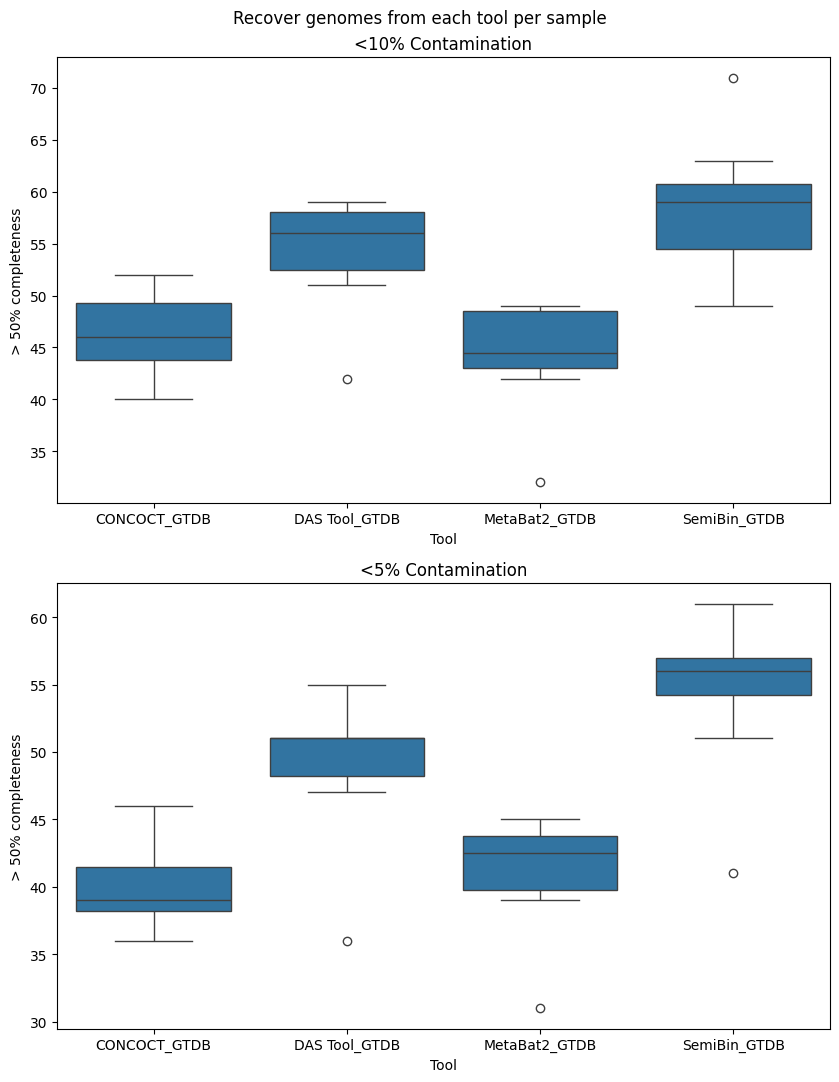

In [18]:
#GENOME RECOVER 
df_genome_filtered = df_genome.loc[:,["Sample", "Tool", "Contamination", '> 50% completeness']]
df_genome_filtered = df_genome_filtered[df_genome_filtered['Tool'] != 'Gold standard']
print(df_genome_filtered.head())

df_smaller_10_cont = df_genome_filtered[df_genome_filtered['Contamination'] == '< 10%']
df_smaller_5_cont = df_genome_filtered[df_genome_filtered['Contamination'] == '< 5%']

print(df_smaller_10_cont.head())
print(df_smaller_5_cont.head())

fig, axes = plt.subplots(2, 1, figsize=(8.5, 11))

fig.suptitle('Recover genomes from each tool per sample')

sns.boxplot(ax=axes[0], x='Tool', y='> 50% completeness', data=df_smaller_10_cont).set(title="<10% Contamination")
sns.boxplot(ax=axes[1], x='Tool', y='> 50% completeness', data=df_smaller_5_cont).set(title="<5% Contamination")
plt.tight_layout()

In [19]:
dfs = []
for k in range(0,10):
    url = f"https://raw.githubusercontent.com/CAMI-challenge/second_challenge_evaluation/501b543f65d62e5c1d6c3813be0badcac5e079ca/binning/taxonomic_binning/marine_dataset/data/results/amber_marine_short_reads_sample_{k}/results.tsv"
    df = pd.read_csv(url, sep="\t")
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

html = merged_df.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html}
</div>
'''
display(HTML(scrollable_html))



Accuracy (bp),Accuracy (bp) (unfiltered),Accuracy (seq),Accuracy (seq) (unfiltered),Adjusted Rand index (bp),Adjusted Rand index (bp) (unfiltered),Adjusted Rand index (seq),Adjusted Rand index (seq) (unfiltered),Average completeness (bp),Average completeness (bp) (unfiltered),Average completeness (seq),Average completeness (seq) (unfiltered),Average purity (bp),Average purity (bp) (unfiltered),Average purity (seq),Average purity (seq) (unfiltered),CAMI 1 F1 score (bp),CAMI 1 F1 score (bp) (unfiltered),CAMI 1 F1 score (seq),CAMI 1 F1 score (seq) (unfiltered),CAMI 1 average completeness (bp),CAMI 1 average completeness (bp) (unfiltered),CAMI 1 average completeness (seq),CAMI 1 average completeness (seq) (unfiltered),CAMI 1 std error of av. completeness (bp),CAMI 1 std error of av. completeness (bp) (unfiltered),CAMI 1 std error of av. completeness (seq),CAMI 1 std error of av. completeness (seq) (unfiltered),Completeness (bp),Completeness (bp) (unfiltered),Completeness (seq),Completeness (seq) (unfiltered),F1 score (bp),F1 score (bp) (unfiltered),F1 score (seq),F1 score (seq) (unfiltered),F1 score for sample (bp),F1 score for sample (bp) (unfiltered),F1 score for sample (seq),F1 score for sample (seq) (unfiltered),Misclassification rate (bp),Misclassification rate (bp) (unfiltered),Misclassification rate (seq),Misclassification rate (seq) (unfiltered),Percentage of binned bp,Percentage of binned bp (unfiltered),Percentage of binned sequences,Percentage of binned sequences (unfiltered),Purity (bp),Purity (bp) (unfiltered),Purity (seq),Purity (seq) (unfiltered),Rand index (bp),Rand index (bp) (unfiltered),Rand index (seq),Rand index (seq) (unfiltered),Sample,Std error of av. completeness (bp),Std error of av. completeness (bp) (unfiltered),Std error of av. completeness (seq),Std error of av. completeness (seq) (unfiltered),Std error of av. purity (bp),Std error of av. purity (bp) (unfiltered),Std error of av. purity (seq),Std error of av. purity (seq) (unfiltered),Tool,UniFrac (bp),UniFrac (bp) (unfiltered),UniFrac (seq),UniFrac (seq) (unfiltered),avg_precision_bp_var,avg_precision_bp_var (unfiltered),avg_recall_bp_var,avg_recall_bp_var (unfiltered),avg_recall_bp_var_cami1,avg_recall_bp_var_cami1 (unfiltered),binning type,rank
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,marmgCAMI2_short_read_sample_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gold standard,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,taxonomic,superkingdom
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,marmgCAMI2_short_read_sample_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gold standard,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,taxonomic,phylum
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,marmgCAMI2_

      Sample           Tool  Purity (bp)     rank
51  sample_0  MetaBat2_GTDB        0.962  species
52  sample_0   CONCOCT_GTDB        0.923  species
53  sample_0   SemiBin_GTDB        0.981  species
54  sample_0  DAS Tool_GTDB        0.985  species
56  sample_1  MetaBat2_GTDB        0.949  species
     Sample           Tool  Purity (bp)    rank
1  sample_0  MetaBat2_GTDB        0.981  phylum
2  sample_0   CONCOCT_GTDB        0.967  phylum
3  sample_0   SemiBin_GTDB        0.992  phylum
4  sample_0  DAS Tool_GTDB        0.998  phylum
6  sample_1  MetaBat2_GTDB        0.947  phylum
                            Sample         Tool  Purity (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.999972  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.999525        phylum
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.999101         class
10  marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.998835         order
11  marmgCAMI2_short_read_sample_0  G

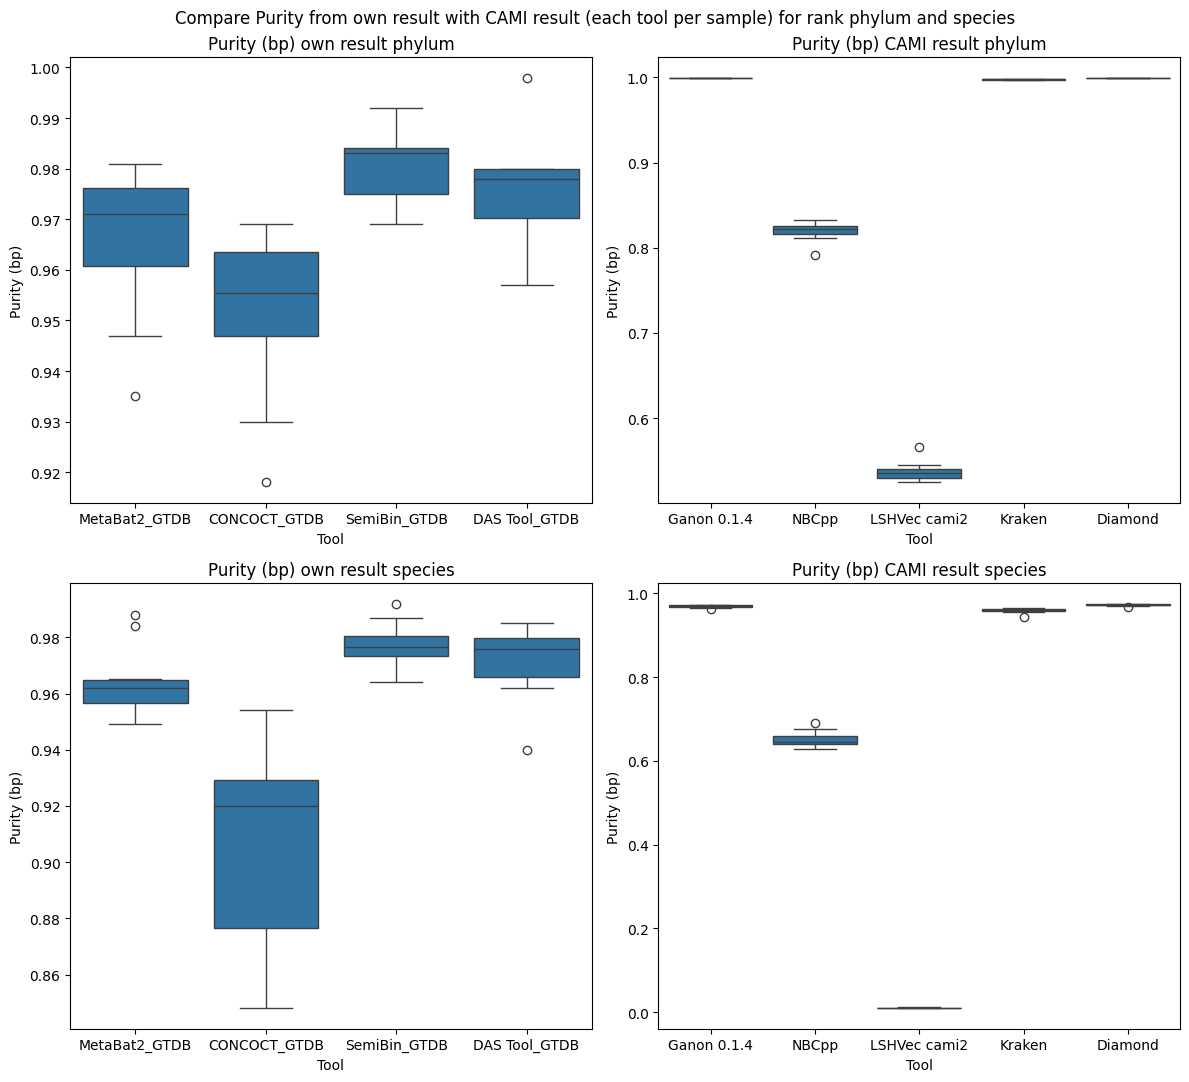

In [20]:
#BOXPLOT FOR PURITY (TAXONOMIC)

purity_tax_df = df_tax_val.loc[:,["Sample", "Tool", "purity_bp", 'rank']]
purity_tax_df.rename(columns={
    'purity_bp': 'Purity (bp)',
}, inplace=True)
purity_tax_df = purity_tax_df[purity_tax_df['Tool'] != 'Gold standard']
purity_tax_df_species = purity_tax_df[purity_tax_df['rank'] == 'species']
purity_tax_df_phylum = purity_tax_df[purity_tax_df['rank'] == 'phylum']
print(purity_tax_df_species.head())
print(purity_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Purity (bp) (unfiltered)", "rank"]]
sub_df_results.rename(columns={
    'Purity (bp) (unfiltered)': 'Purity (bp)',
}, inplace=True)
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare Purity from own result with CAMI result (each tool per sample) for rank phylum and species')

sns.boxplot(ax=axes[0, 0], x='Tool', y='Purity (bp)', data=purity_tax_df_phylum).set(title="Purity (bp) own result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='Purity (bp)', data=sub_df_results_phylum).set(title="Purity (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='Purity (bp)', data=purity_tax_df_species).set(title="Purity (bp) own result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='Purity (bp)', data=sub_df_results_species).set(title="Purity (bp) CAMI result species")
plt.tight_layout()


      Sample           Tool  Completeness (bp)     rank
51  sample_0  MetaBat2_GTDB              0.115  species
52  sample_0   CONCOCT_GTDB              0.134  species
53  sample_0   SemiBin_GTDB              0.154  species
54  sample_0  DAS Tool_GTDB              0.133  species
56  sample_1  MetaBat2_GTDB              0.138  species
     Sample           Tool  Completeness (bp)    rank
1  sample_0  MetaBat2_GTDB              0.174  phylum
2  sample_0   CONCOCT_GTDB              0.221  phylum
3  sample_0   SemiBin_GTDB              0.258  phylum
4  sample_0  DAS Tool_GTDB              0.207  phylum
6  sample_1  MetaBat2_GTDB              0.183  phylum
                            Sample         Tool  Completeness (bp)  \
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4           0.942608   
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4           0.942363   
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4           0.941583   
10  marmgCAMI2_short_read_sample_0  Ganon 0.1.4           0.

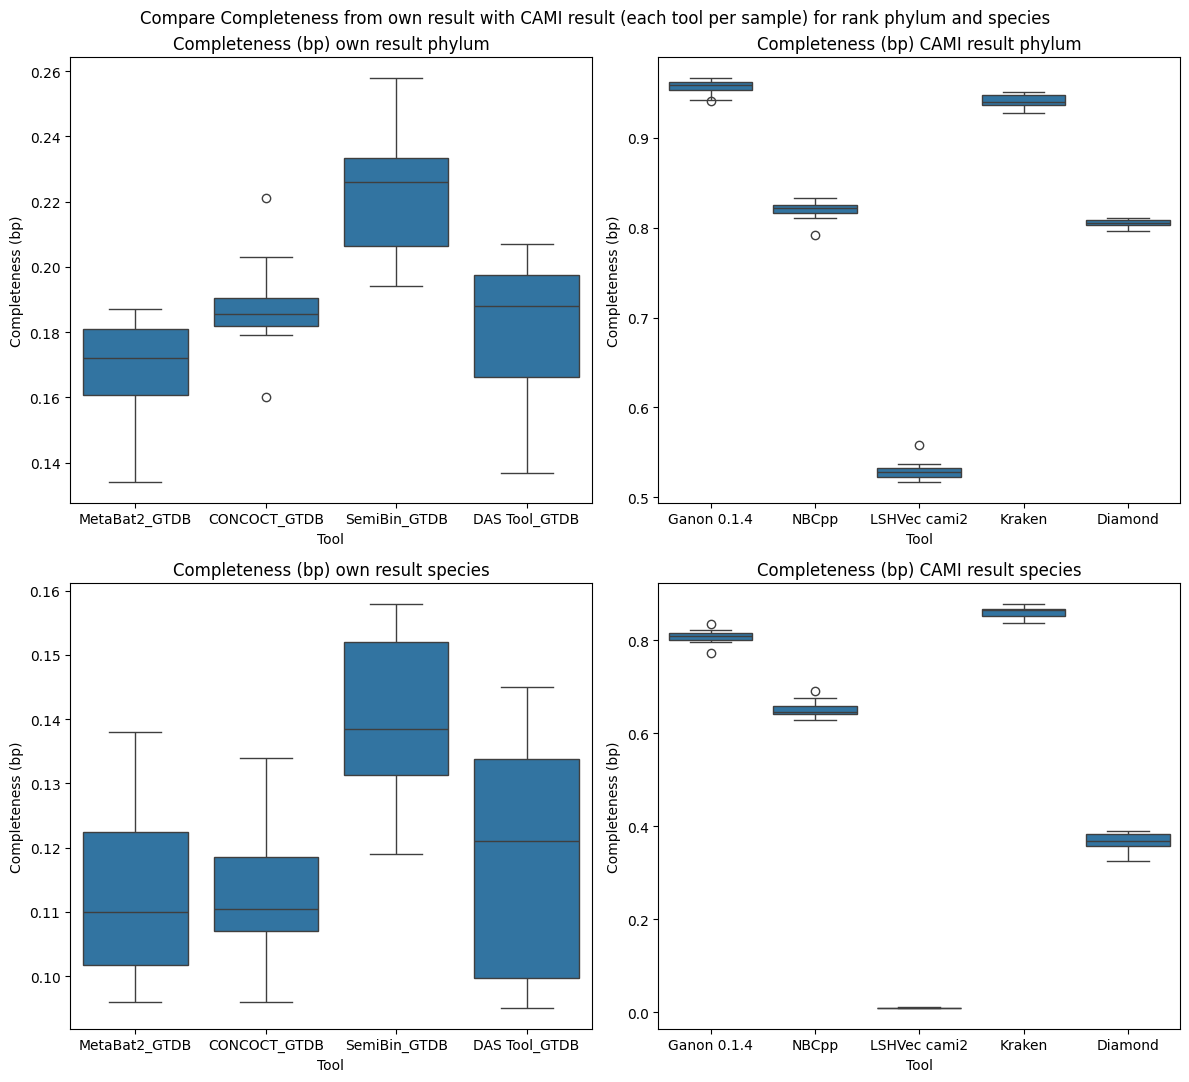

In [21]:
#BOXPLOT FOR COMPLETENESS (TAXONOMIC)

completeness_tax_df = df_tax_val.loc[:,["Sample", "Tool", "completeness_bp", 'rank']]
completeness_tax_df.rename(columns={
    'completeness_bp': 'Completeness (bp)',
}, inplace=True)
completeness_tax_df = completeness_tax_df[completeness_tax_df['Tool'] != 'Gold standard']
completeness_tax_df_species = completeness_tax_df[completeness_tax_df['rank'] == 'species']
completeness_tax_df_phylum = completeness_tax_df[completeness_tax_df['rank'] == 'phylum']
print(completeness_tax_df_species.head())
print(completeness_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Completeness (bp) (unfiltered)", "rank"]]
sub_df_results.rename(columns={
    'Completeness (bp) (unfiltered)': 'Completeness (bp)',
}, inplace=True)
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare Completeness from own result with CAMI result (each tool per sample) for rank phylum and species')

sns.boxplot(ax=axes[0, 0], x='Tool', y='Completeness (bp)', data=completeness_tax_df_phylum).set(title="Completeness (bp) own result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='Completeness (bp)', data=sub_df_results_phylum).set(title="Completeness (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='Completeness (bp)', data=completeness_tax_df_species).set(title="Completeness (bp) own result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='Completeness (bp)', data=sub_df_results_species).set(title="Completeness (bp) CAMI result species")
plt.tight_layout()

      Sample           Tool  Percentage of bp binned (bp)     rank
51  sample_0  MetaBat2_GTDB                         0.120  species
52  sample_0   CONCOCT_GTDB                         0.146  species
53  sample_0   SemiBin_GTDB                         0.157  species
54  sample_0  DAS Tool_GTDB                         0.135  species
56  sample_1  MetaBat2_GTDB                         0.146  species
     Sample           Tool  Percentage of bp binned (bp)    rank
1  sample_0  MetaBat2_GTDB                         0.177  phylum
2  sample_0   CONCOCT_GTDB                         0.228  phylum
3  sample_0   SemiBin_GTDB                         0.260  phylum
4  sample_0  DAS Tool_GTDB                         0.208  phylum
6  sample_1  MetaBat2_GTDB                         0.193  phylum
                            Sample         Tool  Percentage of bp binned (bp)  \
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4                      0.942635   
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.

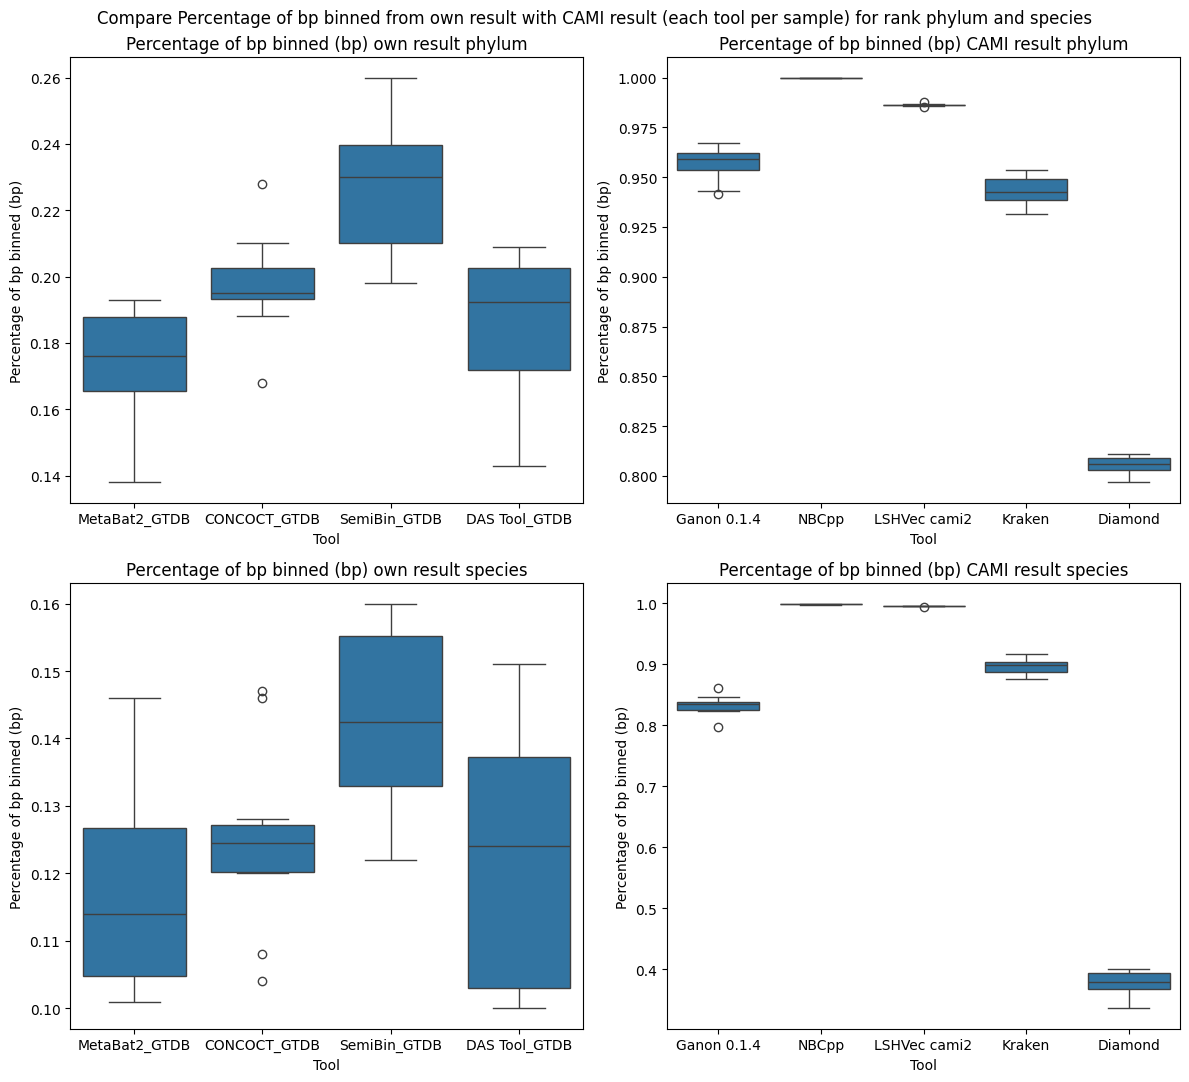

In [22]:
#BOXPLOT FOR PERCENTAGE BINNED (TAXONOMIC)

percentage_tax_df = df_tax_val.loc[:,["Sample", "Tool", "percentage_binned_pb", 'rank']]
percentage_tax_df.rename(columns={
    'percentage_binned_pb': 'Percentage of bp binned (bp)',
}, inplace=True)

percentage_tax_df = percentage_tax_df[percentage_tax_df['Tool'] != 'Gold standard']
percentage_tax_df_species = percentage_tax_df[percentage_tax_df['rank'] == 'species']
percentage_tax_df_phylum = percentage_tax_df[percentage_tax_df['rank'] == 'phylum']
print(percentage_tax_df_species.head())
print(percentage_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Percentage of binned bp (unfiltered)", "rank"]]
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results.rename(columns={
    'Percentage of binned bp (unfiltered)': 'Percentage of bp binned (bp)',
}, inplace=True)

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare Percentage of bp binned from own result with CAMI result (each tool per sample) for rank phylum and species')

sns.boxplot(ax=axes[0, 0], x='Tool', y='Percentage of bp binned (bp)', data=percentage_tax_df_phylum).set(title="Percentage of bp binned (bp) own result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='Percentage of bp binned (bp)', data=sub_df_results_phylum).set(title="Percentage of bp binned (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='Percentage of bp binned (bp)', data=percentage_tax_df_species).set(title="Percentage of bp binned (bp) own result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='Percentage of bp binned (bp)', data=sub_df_results_species).set(title="Percentage of bp binned (bp) CAMI result species")
plt.tight_layout()

      Sample           Tool  ARI (bp)     rank binning type
63  sample_0  MetaBat2_GTDB  0.979873  species    taxonomic
70  sample_0   CONCOCT_GTDB  0.932703  species    taxonomic
77  sample_0   SemiBin_GTDB  0.985254  species    taxonomic
84  sample_0  DAS Tool_GTDB  0.984261  species    taxonomic
99  sample_1  MetaBat2_GTDB  0.910945  species    taxonomic
      Sample           Tool  ARI (bp)    rank binning type
58  sample_0  MetaBat2_GTDB  0.989074  phylum    taxonomic
65  sample_0   CONCOCT_GTDB  0.984497  phylum    taxonomic
72  sample_0   SemiBin_GTDB  0.996450  phylum    taxonomic
79  sample_0  DAS Tool_GTDB  0.996947  phylum    taxonomic
94  sample_1  MetaBat2_GTDB  0.984382  phylum    taxonomic
                            Sample         Tool  ARI (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  1.000006  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  1.000156        phylum
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  1.000142         clas

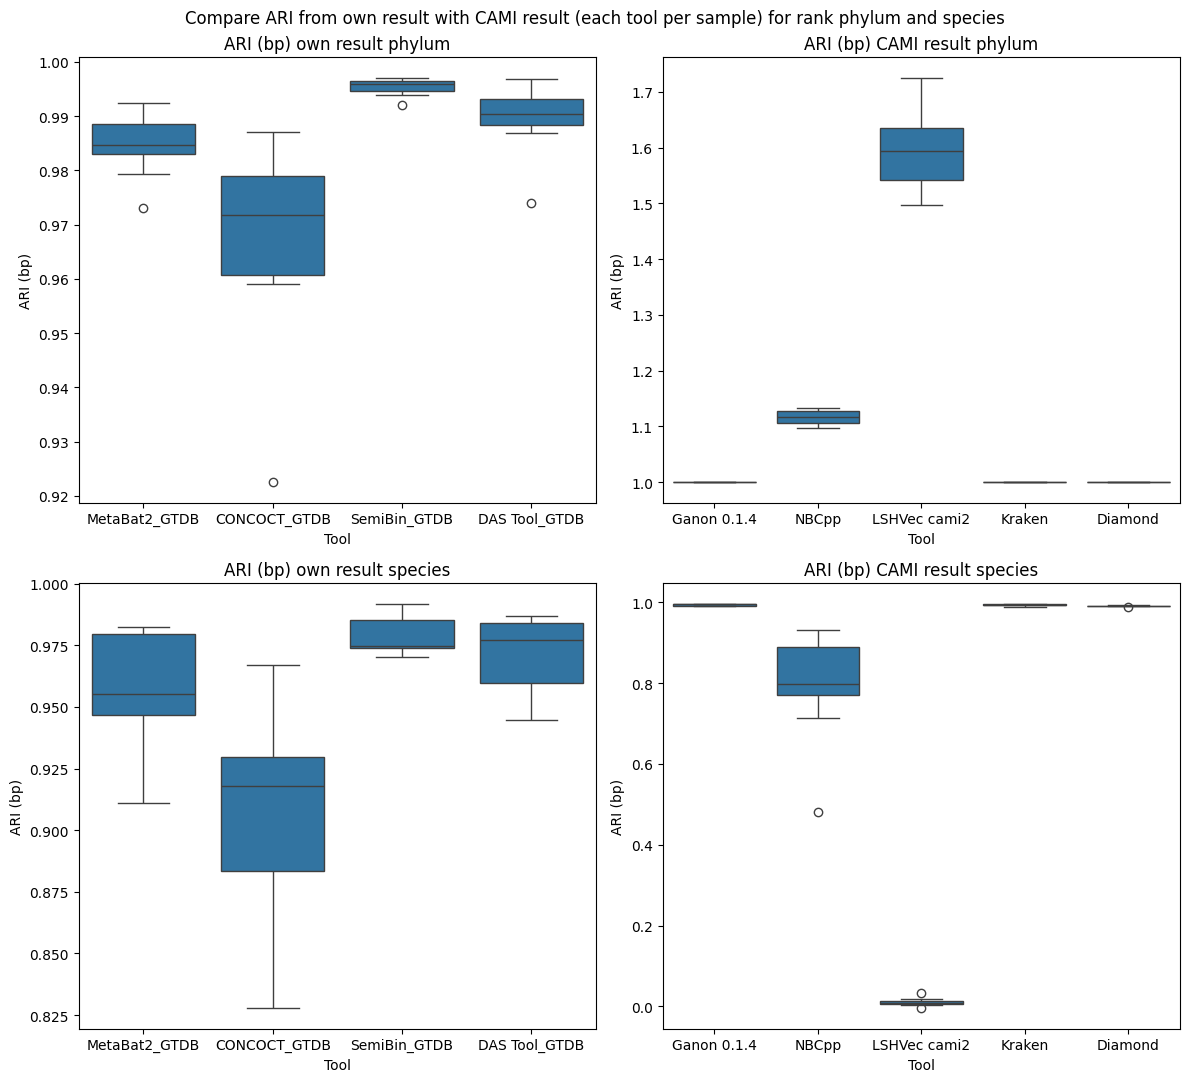

In [23]:
#BOXPLOT FOR ARI (TAXONOMIC)

ari_tax_df = df_result.loc[:,["Sample", "Tool", "adjusted_rand_index_bp", 'rank', 'binning type']]
ari_tax_df.rename(columns={
    'adjusted_rand_index_bp': 'ARI (bp)',
}, inplace=True)

ari_tax_df = ari_tax_df[ari_tax_df['Tool'] != 'Gold standard']
ari_tax_df = ari_tax_df[ari_tax_df['binning type'] == 'taxonomic']
ari_tax_df_species = ari_tax_df[ari_tax_df['rank'] == 'species']
ari_tax_df_phylum = ari_tax_df[ari_tax_df['rank'] == 'phylum']
print(ari_tax_df_species.head())
print(ari_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Adjusted Rand index (bp) (unfiltered)", "rank"]]
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results.rename(columns={
    'Adjusted Rand index (bp) (unfiltered)': 'ARI (bp)',
}, inplace=True)

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare ARI from own result with CAMI result (each tool per sample) for rank phylum and species')

sns.boxplot(ax=axes[0, 0], x='Tool', y='ARI (bp)', data=ari_tax_df_phylum).set(title="ARI (bp) own result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='ARI (bp)', data=sub_df_results_phylum).set(title="ARI (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='ARI (bp)', data=ari_tax_df_species).set(title="ARI (bp) own result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='ARI (bp)', data=sub_df_results_species).set(title="ARI (bp) CAMI result species")
plt.tight_layout()

      Sample           Tool   RI (bp)     rank binning type
63  sample_0  MetaBat2_GTDB  0.998501  species    taxonomic
70  sample_0   CONCOCT_GTDB  0.995660  species    taxonomic
77  sample_0   SemiBin_GTDB  0.999143  species    taxonomic
84  sample_0  DAS Tool_GTDB  0.998917  species    taxonomic
99  sample_1  MetaBat2_GTDB  0.994676  species    taxonomic
      Sample           Tool   RI (bp)    rank binning type
58  sample_0  MetaBat2_GTDB  0.995349  phylum    taxonomic
65  sample_0   CONCOCT_GTDB  0.994147  phylum    taxonomic
72  sample_0   SemiBin_GTDB  0.998267  phylum    taxonomic
79  sample_0  DAS Tool_GTDB  0.998589  phylum    taxonomic
94  sample_1  MetaBat2_GTDB  0.994126  phylum    taxonomic
                            Sample         Tool   RI (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  0.999587  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  0.994969        phylum
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  0.994175         clas

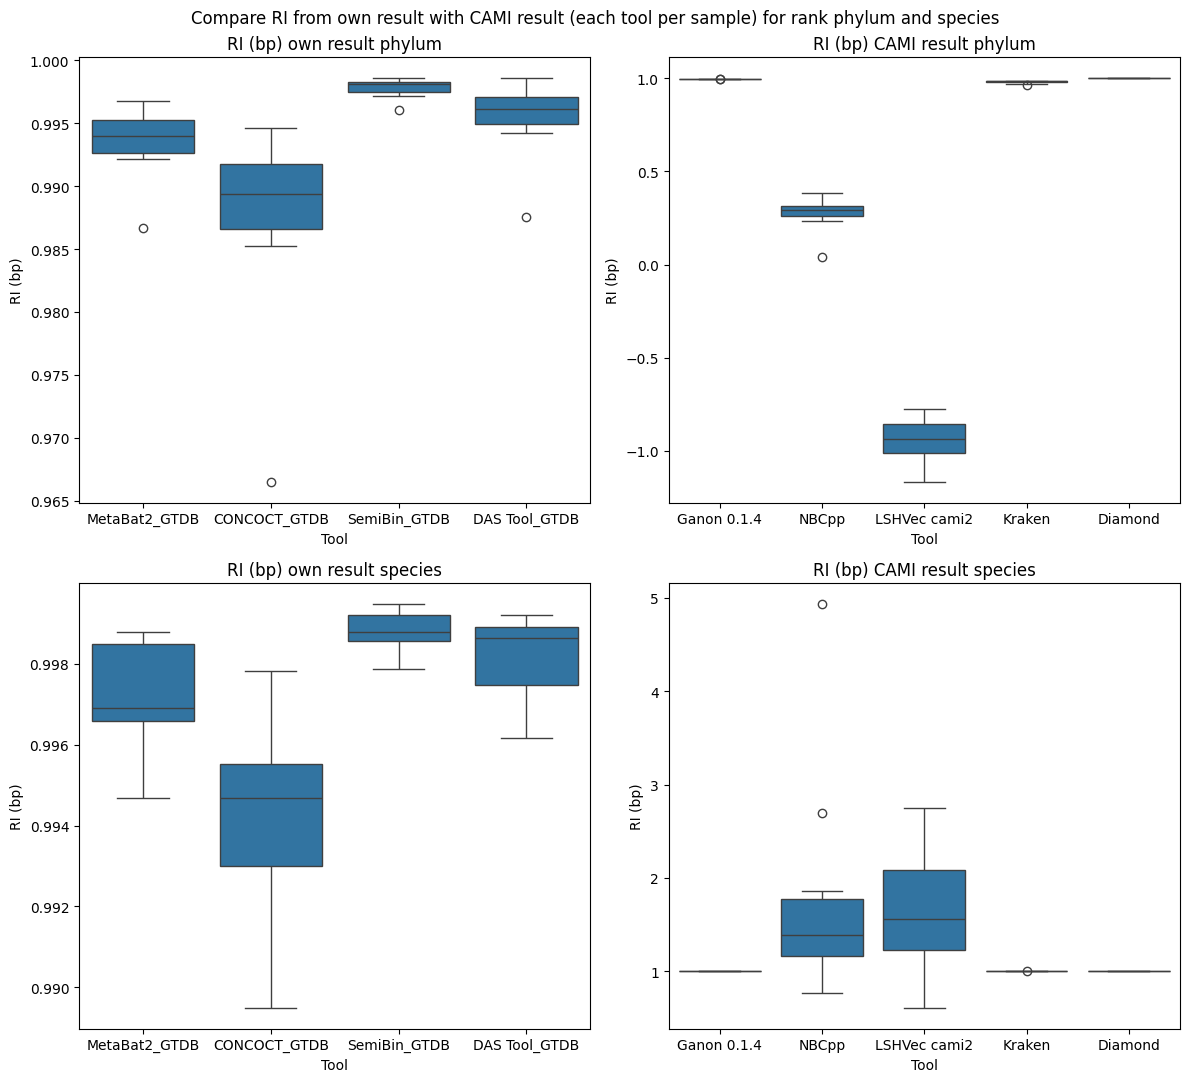

In [24]:
#BOXPLOT FOR RI (TAXONOMIC)

ri_tax_df = df_result.loc[:,["Sample", "Tool", "rand_index_bp", 'rank', 'binning type']]
ri_tax_df.rename(columns={
    'rand_index_bp': 'RI (bp)',
}, inplace=True)

ri_tax_df = ri_tax_df[ri_tax_df['Tool'] != 'Gold standard']
ri_tax_df = ri_tax_df[ri_tax_df['binning type'] == 'taxonomic']
ri_tax_df_species = ri_tax_df[ri_tax_df['rank'] == 'species']
ri_tax_df_phylum = ri_tax_df[ri_tax_df['rank'] == 'phylum']
print(ri_tax_df_species.head())
print(ri_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Rand index (bp) (unfiltered)", "rank"]]
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results.rename(columns={
    'Rand index (bp) (unfiltered)': 'RI (bp)',
}, inplace=True)

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare RI from own result with CAMI result (each tool per sample) for rank phylum and species')

sns.boxplot(ax=axes[0, 0], x='Tool', y='RI (bp)', data=ri_tax_df_phylum).set(title="RI (bp) own result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='RI (bp)', data=sub_df_results_phylum).set(title="RI (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='RI (bp)', data=ri_tax_df_species).set(title="RI (bp) own result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='RI (bp)', data=sub_df_results_species).set(title="RI (bp) CAMI result species")
plt.tight_layout()

      Sample           Tool  UniFrac (bp)     rank
63  sample_0  MetaBat2_GTDB      5.568741  species
70  sample_0   CONCOCT_GTDB      4.887854  species
77  sample_0   SemiBin_GTDB      3.603987  species
84  sample_0  DAS Tool_GTDB      4.727762  species
99  sample_1  MetaBat2_GTDB      5.681796  species
      Sample           Tool  UniFrac (bp)    rank
58  sample_0  MetaBat2_GTDB      5.568741  phylum
65  sample_0   CONCOCT_GTDB      4.887854  phylum
72  sample_0   SemiBin_GTDB      3.603987  phylum
79  sample_0  DAS Tool_GTDB      4.727762  phylum
94  sample_1  MetaBat2_GTDB      5.681796  phylum
                            Sample         Tool  UniFrac (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0.464297  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0.464297        phylum
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0.464297         class
10  marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0.464297         order
11  marmgCAMI2

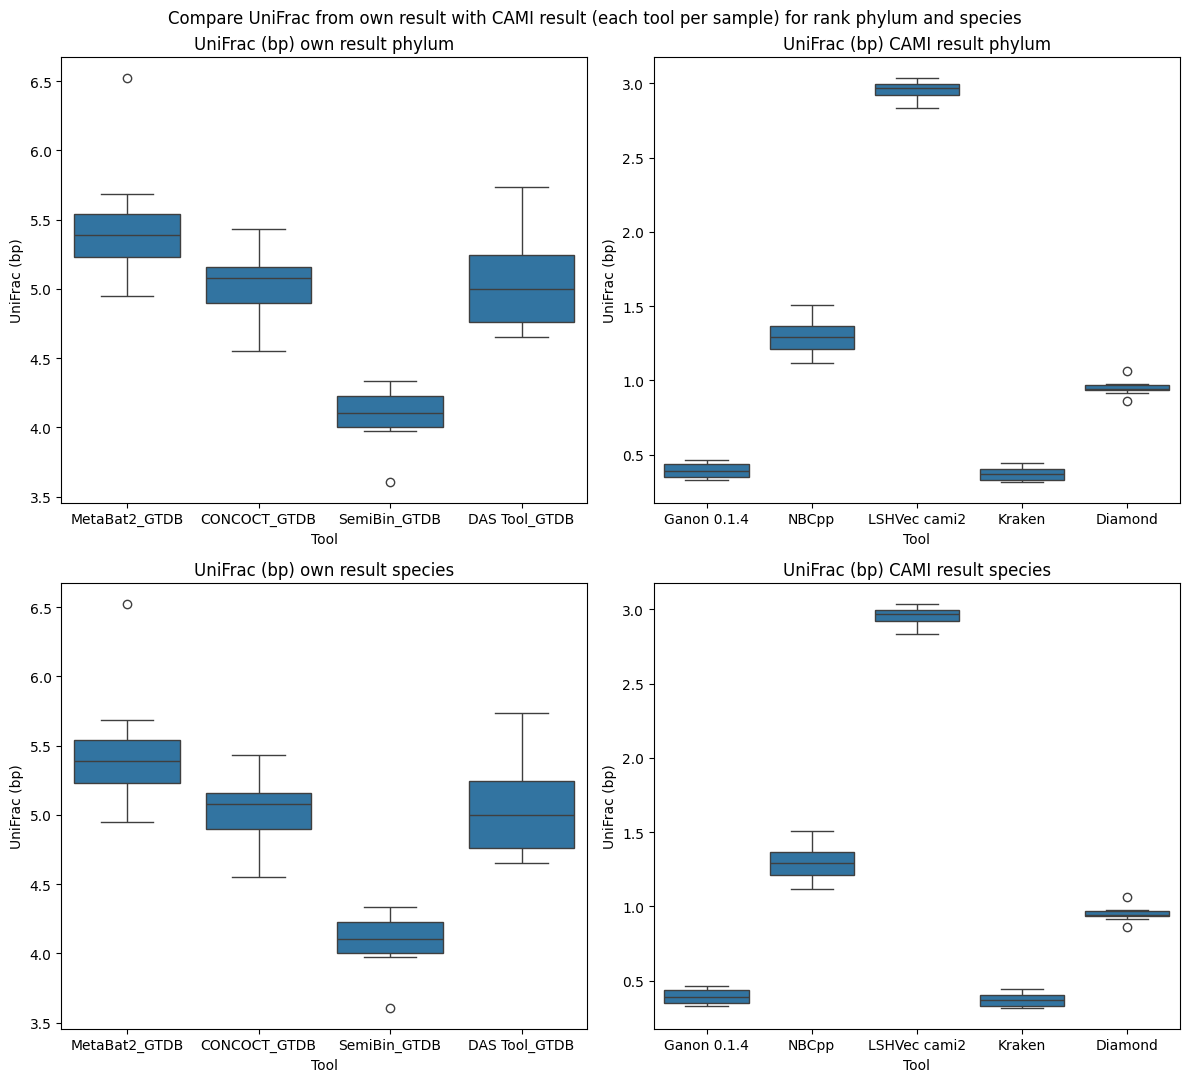

In [25]:
#BOXPLOT FOR UNIFRAC (TAXONOMIC)

uf_tax_df = df_result.loc[:,["Sample", "Tool", "unifrac_bp", 'rank']]
uf_tax_df.rename(columns={
    'unifrac_bp': 'UniFrac (bp)',
}, inplace=True)

uf_tax_df = uf_tax_df[uf_tax_df['Tool'] != 'Gold standard']
uf_tax_df_species = uf_tax_df[uf_tax_df['rank'] == 'species']
uf_tax_df_phylum = uf_tax_df[uf_tax_df['rank'] == 'phylum']
print(uf_tax_df_species.head())
print(uf_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "UniFrac (bp) (unfiltered)", "rank"]]
sub_df_results.rename(columns={
    'UniFrac (bp) (unfiltered)': 'UniFrac (bp)',
}, inplace=True)
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare UniFrac from own result with CAMI result (each tool per sample) for rank phylum and species')

sns.boxplot(ax=axes[0, 0], x='Tool', y='UniFrac (bp)', data=uf_tax_df_phylum).set(title="UniFrac (bp) own result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='UniFrac (bp)', data=sub_df_results_phylum).set(title="UniFrac (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='UniFrac (bp)', data=uf_tax_df_species).set(title="UniFrac (bp) own result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='UniFrac (bp)', data=sub_df_results_species).set(title="UniFrac (bp) CAMI result species")
plt.tight_layout()